In [2]:
import numpy as np
import matplotlib.pyplot as plt
import CP_ALS3 as cp

## Sparse Random Tensor

In [3]:
%%time
init_shape = (10, 10, 10)
coo, vals = cp.gen_coo_tensor(init_shape, density=0.02)
assert cp.check_coo_tensor(coo)!= "Bad"

CPU times: user 1.55 s, sys: 165 ms, total: 1.72 s
Wall time: 1.53 s


In [4]:
coo.shape[0]

20

In [5]:
coo[coo[:, 0] == 0]

array([[0, 7, 0],
       [0, 4, 3]])

In [7]:
%%time
max_iter = 10
rank = 50
a, b, c, err = cp.cp_als3(coo, vals, init_shape, rank=rank, max_iter=max_iter)

iterations over
CPU times: user 68 ms, sys: 142 µs, total: 68.1 ms
Wall time: 34.8 ms


In [8]:
error = cp.sqrt_err(coo, vals, init_shape, a, b, c)
rerror = cp.sqrt_err_relative(coo, vals, init_shape, a, b, c)
print(f"Abs err = {error};\nRel err = {rerror};")

Abs err = 0.01560987105146227;
Rel err = 0.0065608197487684134;


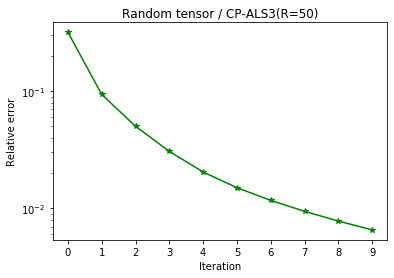

In [9]:
plt.xlabel("Iteration")
plt.ylabel("Relative error")
plt.title(f"Random tensor / CP-ALS3(R={rank})")
plt.xticks(np.arange(max_iter))
plt.yscale("log")
plt.plot(np.arange(max_iter), err[:max_iter], 'g-*')

## Hilbert Tensor

In [10]:
hilbert_shape = (100, 100, 100)
coo, vals = cp.gen_hilbert_tensor(hilbert_shape)

In [11]:
coo.shape

(1000000, 3)

In [13]:
%%time
max_iter = 10
rank = 81
a, b, c, err = cp.cp_als3(coo, vals, hilbert_shape, rank=rank, max_iter=max_iter)

iterations over
CPU times: user 21.8 s, sys: 1.02 s, total: 22.8 s
Wall time: 15 s


In [14]:
rerror = cp.sqrt_err_relative(coo, vals, hilbert_shape, a, b, c)
print(f"Rel err = {rerror};")

Rel err = 0.009145094250276048;


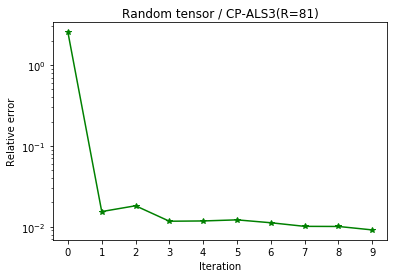

In [15]:
plt.xlabel("Iteration")
plt.ylabel("Relative error")
plt.title(f"Random tensor / CP-ALS3(R={rank})")
plt.xticks(np.arange(max_iter))
plt.yscale("log")
plt.plot(np.arange(max_iter), err[:max_iter], 'g-*')

In [185]:
minima = 200
for i in range(rank):
    for j in range(rank):
        for k in range(rank):
            for m in range(rank):
                for n in range(rank):
                    for z in range(rank):
                            slicer = [i, j, k, m, n, z]
                            rerror = cp.sqrt_err_relative(
                                coo,
                                vals,
                                27,
                                (3, 3, 3),
                                a[:, slicer],
                                b[:, slicer],
                                c[:, slicer],
                            )
                            if rerror <= minima:
                                minima = rerror
                                params = [i, j, k, m, n, z]
                                params.sort()

print(f"Rel err = {minima}; {params}")

Rel err = 8.883885805668126e-05; [0, 1, 2, 3, 4, 5]


In [16]:
shape = (10, 11, 12)
rank = 3
p = np.zeros(shape=(shape[0], rank))
q = np.zeros(shape=(shape[1], rank))
r = np.zeros(shape=(shape[2], rank))
all_elem = np.prod(shape)
all_elem

1320

In [17]:
p[0] = [1, 0, 0]
p[1] = [0, 1, 0]
p[2] = [0, 0, 1]

q[0] = [1, 0, 0]
q[1] = [0, 1, 0]
q[2] = [0, 0, 1]

r[0] = [1, 0, 0]
r[1] = [0, 1, 0]
r[2] = [0, 0, 1]

p[3] = [1, 0, 1]
q[4] = [1, 0, 1]
r[5] = [1, 0, 1]

In [18]:
coo = list()
vals = list()
nnz = 0
for i in range(shape[0]):
    for j in range(shape[1]):
        for k in range(shape[2]):
            temp = np.sum(p[i, :] * q[j, :] * r[k, :])
            if temp != 0:
                vals.append(temp)
                coo.append((i, j, k))
                nnz += 1
coo = np.array(coo)
vals = np.array(vals)

In [56]:
%%time
max_iter = 10
rank = 7
a, b, c, err = cp.cp_als3(coo, vals, shape, rank=rank, max_iter=max_iter)

iterations over
CPU times: user 1.3 ms, sys: 43 µs, total: 1.34 ms
Wall time: 1.32 ms


In [57]:
rerror = cp.sqrt_err_relative(coo, vals, hilbert_shape, a, b, c)
print(f"Rel err = {rerror};")

Rel err = 2.329544048628348e-06;


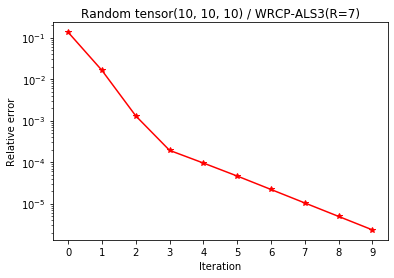

In [58]:
plt.xlabel("Iteration")
plt.ylabel("Relative error")
plt.title(f"Random tensor{init_shape} / WRCP-ALS3(R={rank})")
plt.xticks(np.arange(max_iter))
plt.yscale("log")
plt.plot(np.arange(max_iter), err[:max_iter], 'r-*')

In [59]:
a

array([[ 0.0274524 , -0.00385721, -0.08694458,  0.07628129, -0.09412695,
        -0.14838205,  0.19935526],
       [ 0.16391335, -0.07978344, -0.03985433,  0.05448693,  0.109021  ,
         0.02603068, -0.00142755],
       [-0.01468658,  0.17316715, -0.07669103,  0.17306424,  0.04818314,
        -0.14167916,  0.083285  ],
       [ 0.01276582,  0.16930994, -0.1636356 ,  0.24934552, -0.0459438 ,
        -0.29006121,  0.28264025],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.    

In [60]:
b

array([[ 1.90242764,  0.14484627,  4.09578054,  1.67958641, -6.30420571,
         2.02968262,  1.71219219],
       [ 1.25324389,  0.29168696, -0.47207119, -0.25377065, -1.74459172,
         0.05094274, -0.33244594],
       [ 0.88650064,  1.68757721,  2.0405073 ,  2.0406857 ,  2.43205742,
         0.76547605,  0.4314911 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 2.78892828,  1.83242347,  6.13628784,  3.72027211, -3.87214828,
         2.79515866,  2.14368329],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.    

In [61]:
c

array([[ 0.60313962,  1.12684438, -1.98647585, -1.99687676,  0.46482266,
         0.09115133,  0.78868047],
       [ 3.55597375, -0.94990607, 10.02996002,  3.70656096, -0.5913945 ,
        -4.04382749,  5.98724037],
       [ 0.45672212,  1.9615983 ,  1.07387793,  1.83637659,  0.23470034,
         0.9608029 ,  0.80411415],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 1.05986174,  3.08844268, -0.91259792, -0.16050017,  0.699523  ,
         1.05195422,  1.59279462],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.    